In [13]:
# Since there are no JSON files in the directory to process, let's create a mock-up scenario.
# We will create four fake JSON files with similar structure as described in the user's script and then perform the analysis and plotting.

import json
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Creating a directory for mock JSON files
directory_path = '../../../eval_api/result/'

# Creating mock data for JSON files as per the described structure in the user's script
mock_data_template = {
    "originality": [{"average_originality": np.random.uniform(2, 5)}],
    "elaboration": [{"average_elaboration": np.random.uniform(3, 5)}],
    "flexibility": [{"average_flexibility": np.random.uniform(7, 10)}],
    "fluency": [{"average_fluency": np.random.uniform(9, 10)}]
}

originality_scores = []
elaboration_scores = []
flexibility_scores = []
fluency_scores = []
file_labels = []

# Processing each JSON file in the mock directory
for filename in tqdm(os.listdir(directory_path)):
    if filename.endswith('.json'):
        file_path = os.path.join(directory_path, filename)

        # Read JSON file
        with open(file_path, 'r') as file:
            data = json.load(file)

        # Calculate the sum of the last scores for each item
        originality = sum(item['originality'][-1]['average_originality'] for item in data)
        elaboration = sum(item['elaboration'][-1]['average_elaboration'] for item in data)
        flexibility = sum(item['flexibility'][-1]['average_flexibility'] for item in data)
        fluency = sum(item['fluency'][-1]['average_fluency'] for item in data)

        # Calculate the average scores
        avg_originality = originality / len(data)
        avg_elaboration = elaboration / len(data)
        avg_flexibility = flexibility / len(data)
        avg_fluency = fluency / len(data)

        # Append the average scores to the lists
        originality_scores.append(avg_originality)
        elaboration_scores.append(avg_elaboration)
        flexibility_scores.append(avg_flexibility)
        fluency_scores.append(avg_fluency)

        # Get the label from the filename without the extension
        label = os.path.splitext(filename)[0]
        file_labels.append(label)
print(file_labels)

100%|██████████| 7/7 [00:00<00:00, 274.34it/s]

['evaluation_discussion_final_results_02-21_2_6_sampling_3_sample', 'evaluation_discussion_final_results_02-21_2_10_sampling_3_sample', 'evaluation_discussion_final_results_02-21_2_2_sampling_3_sample', 'evaluation_discussion_final_results_02-21_2_8_sampling_3_sample', 'evaluation_discussion_final_results_02-21_2_4_sampling_3_sample']


In [24]:

# get the extracted_labels for the plotting
extracted_labels = []
for label in file_labels:
    # Split the label by underscores and find the segment just before '_sampling'
    # print(label)
    parts = label.split('_')
    # print(parts)
    extracted_labels.append(int(parts[6]))

extracted_labels.sort()
extracted_labels = [str(label) for label in extracted_labels]
print(extracted_labels)

['2', '4', '6', '8', '10']


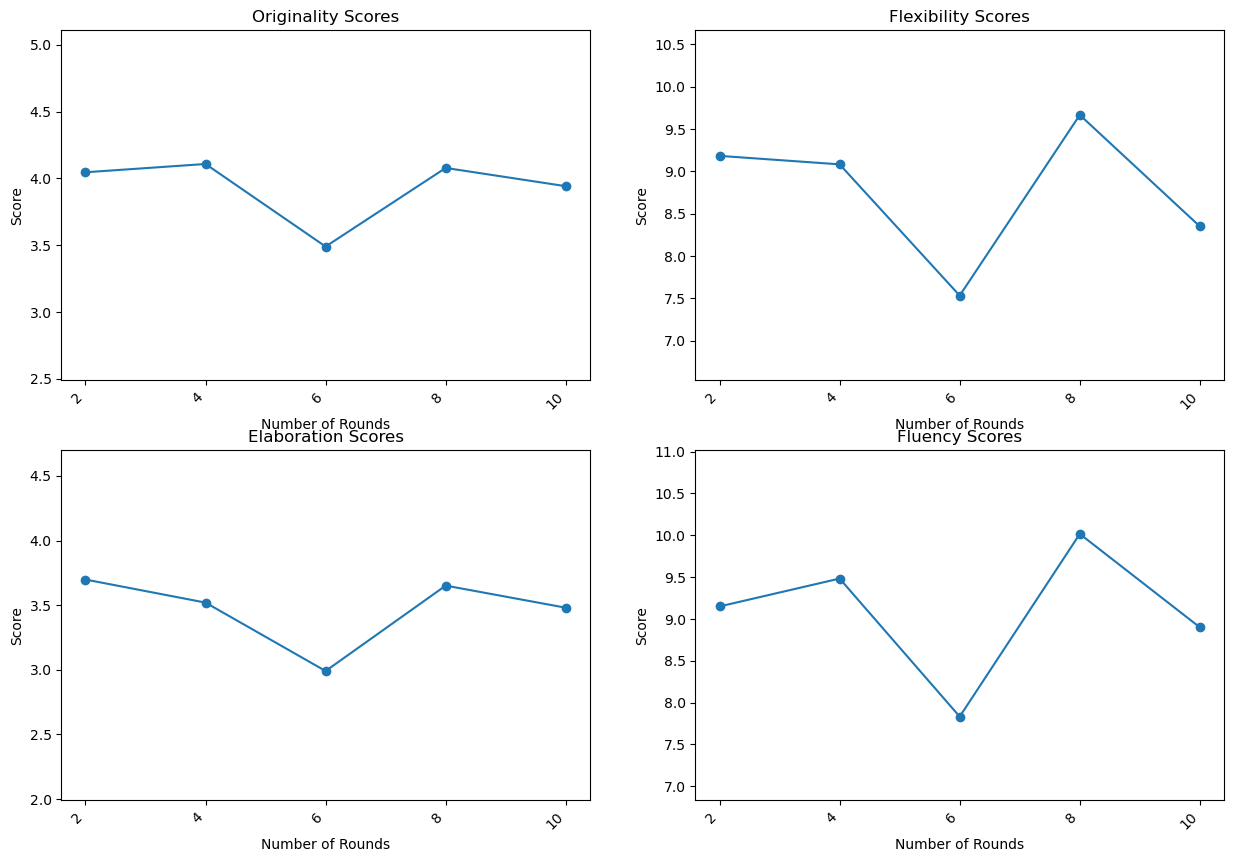

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(30, 20))  # 2x2 grid of subplots

# Defining a simple function to format the subplot for consistency
def format_subplot(ax, title, scores, labels):
    ax.plot(labels, scores, marker='o')
    ax.set_title(title)
    ax.set_xlabel('Number of Rounds')
    ax.set_ylabel('Score') 

    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_ylim([min(scores) - 1, max(scores) + 1])  # setting y-limits for better comparison

# Plot each category
format_subplot(axs[0, 0], 'Originality Scores', originality_scores, extracted_labels)
format_subplot(axs[0, 1], 'Flexibility Scores', flexibility_scores, extracted_labels)
format_subplot(axs[1, 0], 'Elaboration Scores', elaboration_scores, extracted_labels)
format_subplot(axs[1, 1], 'Fluency Scores', fluency_scores, extracted_labels)
